## Set Up GPU

In [1]:
import tensorflow as tf

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


## Import Modal

In [2]:
from google.colab import files
from tensorflow.keras.models import load_model

# Upload model file
uploaded = files.upload()

# Get the uploaded file name
model_filename = list(uploaded.keys())[0]

# Load the model
model = load_model(model_filename)

print(f"Model '{model_filename}' loaded successfully!")



Saving InceptionNet.keras to InceptionNet.keras
Model 'InceptionNet.keras' loaded successfully!


## Mount Google Drive


In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


## Load & Pre-process Test Data

In [4]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


# Define test dataset path
test_data_path = "/content/drive/MyDrive/Xpert_Scan/test/"

# Load test dataset
test_dataset = image_dataset_from_directory(
    test_data_path,
    image_size=(299, 299),  # Match model input
    batch_size=32,
    shuffle=False  # No shuffling for evaluation
)

# Get class names
class_names = test_dataset.class_names
print("Class names:", class_names)


Found 1876 files belonging to 6 classes.
Class names: ['COPD', 'Covid19', 'Lung_Metastasis', 'Normal', 'Pneumonia', 'Tuberculosis']


## Get Modal Predictions

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize lists
y_true = []
y_pred = []

# Iterate through test dataset and collect predictions
for images, labels in test_dataset:
    y_true.extend(labels.numpy())  # Actual labels
    preds = model.predict(images)  # Model predictions
    y_pred.extend(np.argmax(preds, axis=1))  # Convert probabilities to class index

# Convert lists to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

## Compute Evaluation Metrices

In [6]:
# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
f1 = f1_score(y_true, y_pred, average="weighted")

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.2074
Precision: 0.0430
Recall: 0.2074
F1 Score: 0.0712


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Plot Confusion Matrix

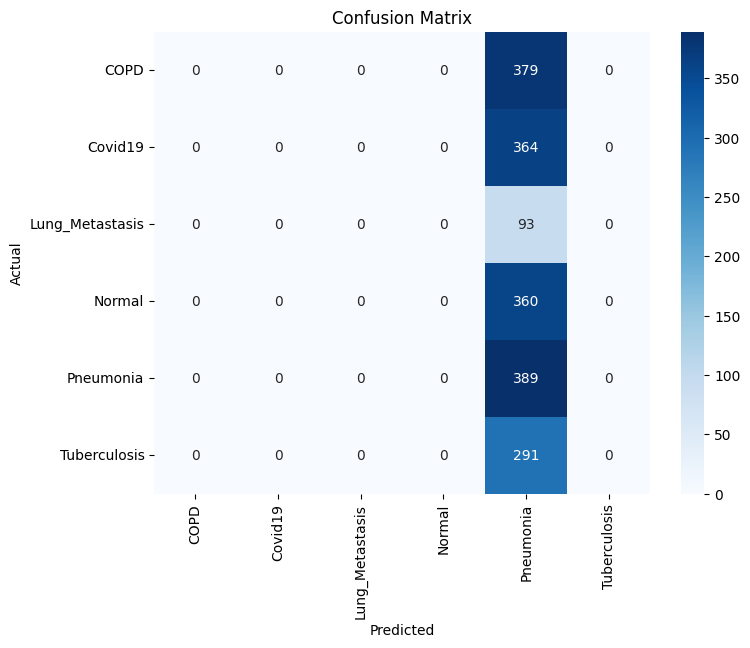

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Plot ROC Curve (for Multi-Class)

59/59 ━━━━━━━━━━━━━━━━━━━━ 178s 3s/step


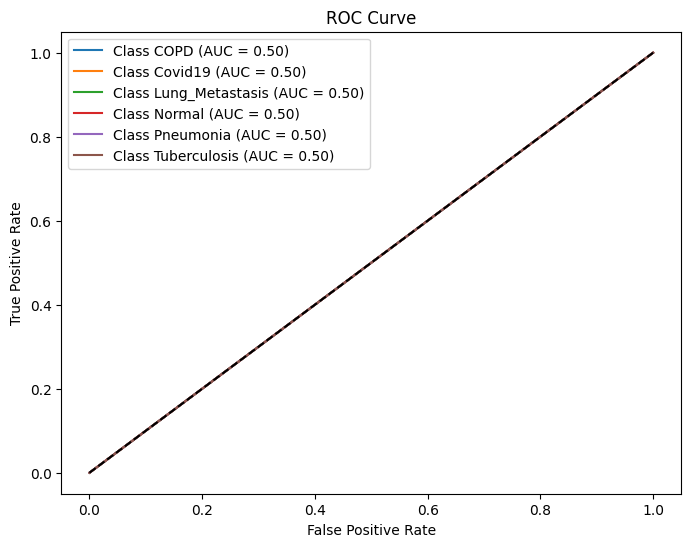

In [8]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels for multi-class ROC
y_true_binarized = label_binarize(y_true, classes=np.arange(len(class_names)))
y_prob = model.predict(test_dataset)

plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
